<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/lecture_9_cnn_part1/homework/hw_cnn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [6]:
import torch
import numpy as np

In [46]:
# Можете тренироваться на этом примере
a = np.arange(12).reshape((3, 4))
M = np.block([[a, a],[a, a]])
M = torch.from_numpy(M)
print(M)
M.size()[0]

tensor([[ 0,  1,  2,  3,  0,  1,  2,  3],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 8,  9, 10, 11,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  0,  1,  2,  3],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 8,  9, 10, 11,  8,  9, 10, 11]])


6

In [47]:
zeros_tensor = torch.zeros(1,M.size()[1])
#print(zeros_tensor)
M1 = torch.cat([zeros_tensor, M, zeros_tensor], dim=0)
#print(M1)
zeros_tensor = torch.zeros(M1.size()[0],1)
#print(zeros_tensor)
M = torch.cat([zeros_tensor, M1, zeros_tensor], dim=1)
M

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.],
        [ 0.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,  0.],
        [ 0.,  8.,  9., 10., 11.,  8.,  9., 10., 11.,  0.],
        [ 0.,  0.,  1.,  2.,  3.,  0.,  1.,  2.,  3.,  0.],
        [ 0.,  4.,  5.,  6.,  7.,  4.,  5.,  6.,  7.,  0.],
        [ 0.,  8.,  9., 10., 11.,  8.,  9., 10., 11.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [70]:
kernel = torch.tensor([[0,0],
                       [1,1]])
kernel

tensor([[0, 0],
        [1, 1]])

In [73]:
stride=2
k = kernel.size()[0]
m = M.size()[0]
n = M.size()[1]
print(m,n)

m_range = list(range(0,m-k+1,stride))
n_range = list(range(0,n-k+1,stride))
print(m_range,n_range)


cov = torch.zeros(len(m_range),len(n_range))

#print(cov)

for i in m_range:
    for j in n_range:
        cov[i//stride,j//stride] = (torch.sum(M[i:i+k,j:j+k] * kernel, dim=[0,1]))
        #print(i,j)
    
        
cov

8 10
[0, 2, 4, 6] [0, 2, 4, 6, 8]


tensor([[ 0.,  3.,  3.,  3.,  3.],
        [ 8., 19., 19., 19., 11.],
        [ 4., 11., 11., 11.,  7.],
        [ 0.,  0.,  0.,  0.,  0.]])

In [94]:
def conv(x, kernel, stride, pad):
    # YOUR CODE IS HERE
    
    for line in range(pad):
        zeros_tensor = torch.zeros(1,x.size()[1])
        x1 = torch.cat([zeros_tensor, x, zeros_tensor], dim=0)
        zeros_tensor = torch.zeros(x1.size()[0],1)
        x = torch.cat([zeros_tensor, x1, zeros_tensor], dim=1)
    
    
    
    k = kernel.size()[0]
    m = x.size()[0]
    n = x.size()[1]
    
    
    
    m_range = list(range(0,m - k + 1, stride))
    n_range = list(range(0,n - k + 1, stride))
    
    cov = torch.zeros(len(m_range),len(n_range))
    

    for i in m_range:
        for j in n_range:
            
            cov[i // stride, j // stride] = (torch.sum(x[i:i + k,j:j + k] * kernel, dim=[0,1]))
    return cov
            

In [96]:
sobel_kernel_vert = torch.Tensor([
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

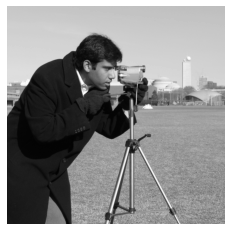

In [7]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

In [98]:
camera = torch.from_numpy(camera)
camera

tensor([[200, 200, 200,  ..., 189, 190, 190],
        [200, 199, 199,  ..., 190, 190, 190],
        [199, 199, 199,  ..., 190, 190, 190],
        ...,
        [ 25,  25,  27,  ..., 139, 122, 147],
        [ 25,  25,  26,  ..., 158, 141, 168],
        [ 25,  25,  27,  ..., 151, 152, 149]], dtype=torch.uint8)

In [99]:
camera_conv_vert = conv(camera,sobel_kernel_vert,1,1)
camera_conv_vert

tensor([[ 599.,   -1.,    1.,  ...,    2.,    2., -570.],
        [ 797.,   -2.,    3.,  ...,    1.,    1., -760.],
        [ 797.,   -2.,    2.,  ...,    0.,    0., -760.],
        ...,
        [ 101.,    6.,   -5.,  ..., -129.,   38., -534.],
        [ 100.,    6.,   -3.,  ...,  -42.,   26., -556.],
        [  75.,    5.,   -1.,  ...,   18.,    6., -445.]])

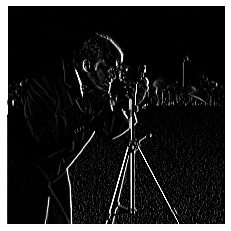

In [100]:
plt.figure()
plt.imshow(camera_conv_vert.numpy().astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

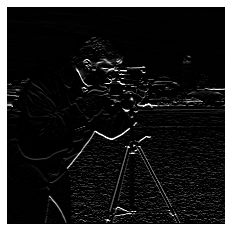

In [103]:
camera_conv_hor = conv(camera,sobel_kernel_hor,1,1)
plt.figure()
plt.imshow(camera_conv_hor.numpy().astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

Допишите код ниже и проинтерпретируйте полученный результат:

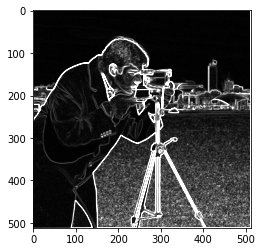

In [104]:
camera_s_hor_filter = conv(camera,sobel_kernel_hor,1,1)
camera_s_vert_filter = conv(camera,sobel_kernel_vert,1,1)
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255);

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [82]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 20 # можно будет при желании увеличить
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [25]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os
 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [108]:
#!wget https://storage.googleapis.com/ibeans/train.zip
#!wget https://storage.googleapis.com/ibeans/validation.zip
#!wget https://storage.googleapis.com/ibeans/test.zip

#clear_output()

In [109]:
#!unzip train.zip
#!unzip validation.zip
#!unzip test.zip

#clear_output()

In [26]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)
        
        transformed_img = self._transforms_for_plot(image)
        
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]
        
        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [27]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

for img, label in trainloader:
    print(label)

tensor([1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1])
tensor([0, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0,
        2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0])
tensor([0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2,
        2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2,
        1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2])
tensor([0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1,
        2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2,
        2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1])
tensor([1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1,
        2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1,

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

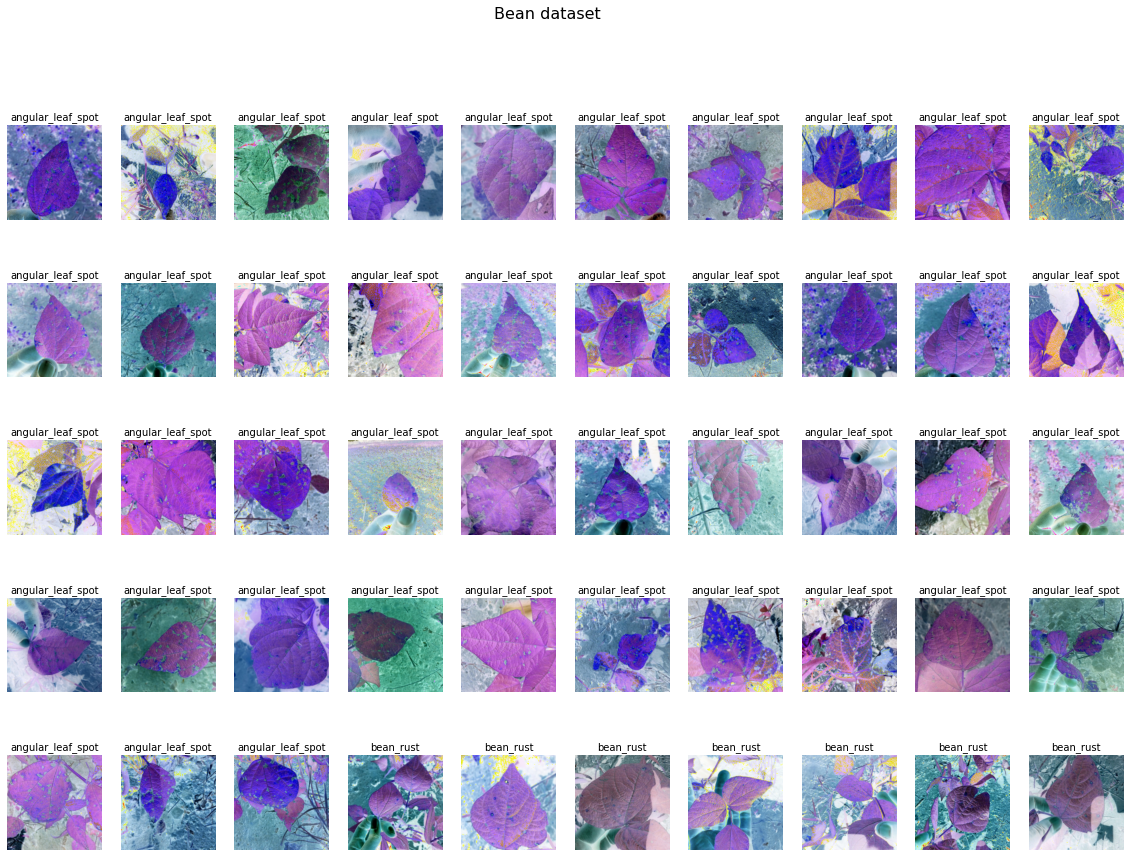

In [12]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)
    
fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

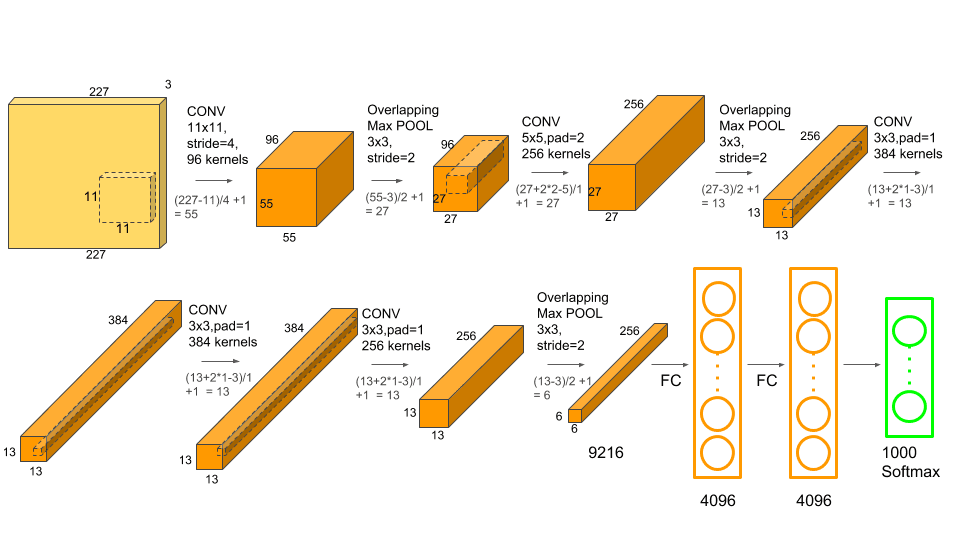

In [79]:
N_CLASSES = 3 # определите число классов в данных
LEARNING_RATE = 1e-5 # можно подобрать как-то другой)

In [83]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE IS HERE
        
        self.x1 = torch.nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4)
        self.x2 = torch.nn.MaxPool2d(kernel_size=3, stride=2)
        self.x3 = torch.nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2)
        self.x4 = torch.nn.MaxPool2d(kernel_size=3, stride=2)
        self.x5 = torch.nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1)
        self.x6 = torch.nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1)
        self.x7 = torch.nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        
        self.x8 = torch.nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.fc1 = nn.Linear(in_features=9216, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=N_CLASSES)
        
        #self.x9 = nn.Softmax(dim=None)
        
        self.activation = nn.ReLU()
    
    def forward(self,x):
        # YOUR CODE IS HERE
        
        x = self.x1(x)
        x = self.activation(x)
        
        x = self.x2(x)
        #x = self.activation(x)
        
        x = self.x3(x)
        x = self.activation(x)
        
        x = self.x4(x)
        #x = self.activation(x)
        
        x = self.x5(x)
        x = self.activation(x)
        
        x = self.x6(x)
        x = self.activation(x)
        
        x = self.x7(x)
        x = self.activation(x)
        
        
        x = self.x8(x)
        #x = self.activation(x)
        
        
        #x = x.view(-1,256*6*6)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        
        logits = x
        probs = F.softmax(logits, dim=1)
        
        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [84]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model - 
    dataloader - 
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [85]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # Оптимизатор
criterion = nn.CrossEntropyLoss() # Функция потерь

18:48:26 --- Epoch: 0	Train loss: 1.0986	Valid loss: 1.0971	Train accuracy: 33.66	Valid accuracy: 33.83
18:49:33 --- Epoch: 1	Train loss: 1.0965	Valid loss: 1.0945	Train accuracy: 44.39	Valid accuracy: 45.86
18:50:38 --- Epoch: 2	Train loss: 1.0902	Valid loss: 1.0801	Train accuracy: 48.16	Valid accuracy: 48.12
18:51:44 --- Epoch: 3	Train loss: 1.0634	Valid loss: 1.0258	Train accuracy: 55.42	Valid accuracy: 57.89
18:52:52 --- Epoch: 4	Train loss: 0.9920	Valid loss: 0.9193	Train accuracy: 63.54	Valid accuracy: 63.91
18:54:01 --- Epoch: 5	Train loss: 0.8931	Valid loss: 0.9516	Train accuracy: 56.29	Valid accuracy: 58.65
18:55:09 --- Epoch: 6	Train loss: 0.8980	Valid loss: 0.8082	Train accuracy: 61.32	Valid accuracy: 67.67
18:56:21 --- Epoch: 7	Train loss: 0.8263	Valid loss: 0.7821	Train accuracy: 68.38	Valid accuracy: 68.42
18:57:39 --- Epoch: 8	Train loss: 0.7930	Valid loss: 0.7790	Train accuracy: 65.47	Valid accuracy: 64.66
18:58:51 --- Epoch: 9	Train loss: 0.7600	Valid loss: 0.7652	Trai

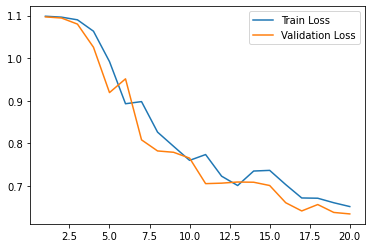

In [86]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

accuracy = 0.782

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

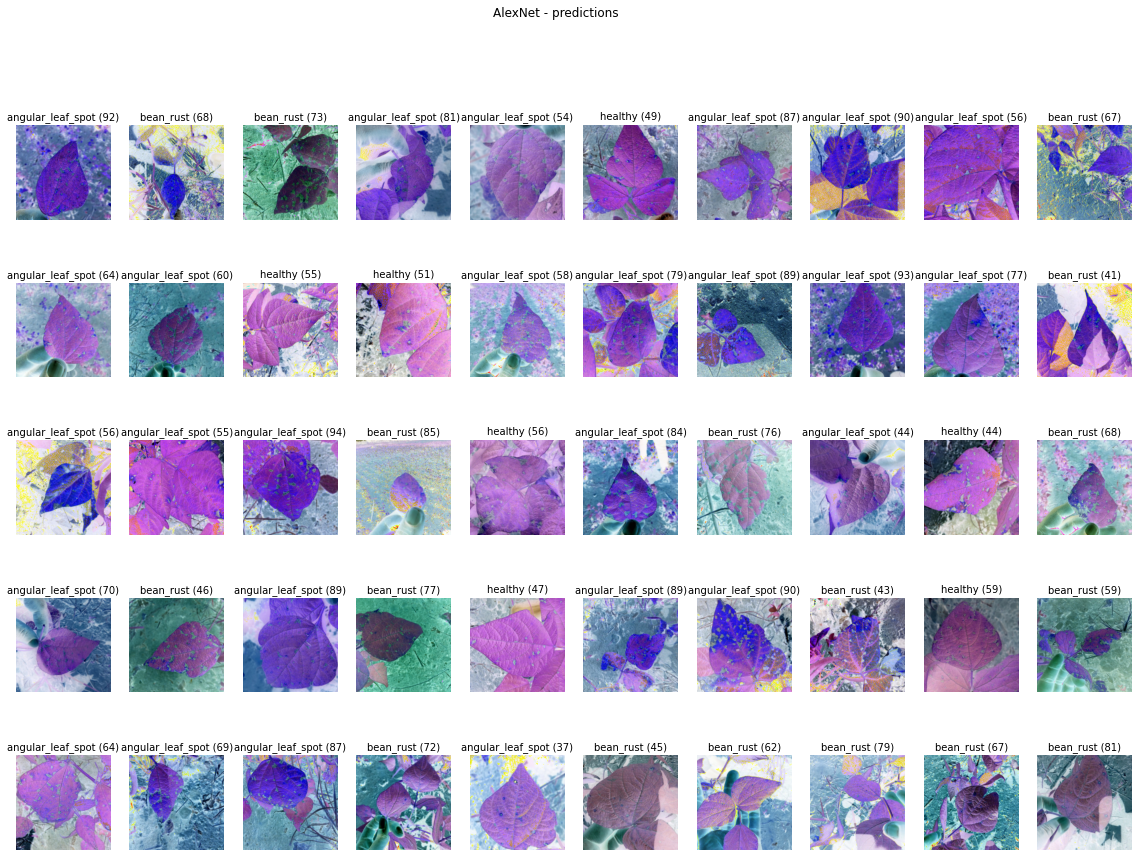

In [87]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    
    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))
        
    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"
    
    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**